# PUI Homework 5: Assignment 3

In [1]:
__author__ = 'Ruben Hambardzumyan, based on the skeleton notebook instructions created by Dr. Federica Bianco'

## 1. Importing the libraries

In [2]:
# Importing the libraries

import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf # for OLS
from __future__ import print_function
import numpy as np
import pylab as pl
import pandas as pd
import scipy as sp
from scipy import stats

%pylab inline

C:\Users\ruham\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


## 2. Getting the data

In [3]:
firearms = pd.read_csv('firearms.csv')
shootings = pd.read_csv('shootings.csv')
population = pd.read_csv('population.csv')
gdp = pd.read_csv('gdp.csv', encoding='latin1')

In [4]:
firearms.columns

Index(['Country', 'ISO code', 'Source', '% of homicides by firearm',
       'Number of homicides by firearm',
       'Homicide by firearm rate per 100,000 pop', 'Rank by rate of ownership',
       'Average firearms per 100 people',
       'Average total all civilian firearms'],
      dtype='object')

In [5]:
shootings.columns

Index(['Country', 'Guns/100 inhabitants', 'Number of mass shootings'], dtype='object')

In [6]:
population.columns

Index(['Country', '2016'], dtype='object')

In [7]:
merge1 = pd.merge(firearms, shootings)

In [8]:
merge2 = pd.merge(merge1, gdp)

In [9]:
data = pd.merge(merge2, population)

In [10]:
data.head()

,Country,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Guns/100 inhabitants,Number of mass shootings,gdp,2016
0,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,15.0,4,1204616,24127159.0
1,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,30.4,1,386428,8747358.0
2,Canada,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,30.8,4,1529760,36286425.0
3,Denmark,DK,CTS,31.9,15.0,0.27,54.0,12.0,650000.0,12.0,0,306143,5731118.0
4,Finland,FI,CTS,19.8,24.0,0.45,4.0,45.3,2400000.0,45.3,2,236785,5495096.0


## 3. Plotting the mass shooting against gdp

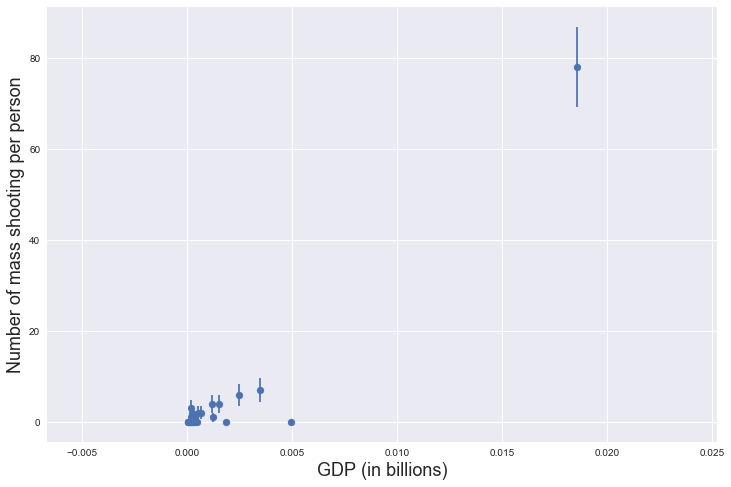

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [11]:
fig = pl.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

scatter = ax.scatter(data.gdp / 1e9, data['Number of mass shootings'])
ax.errorbar(data.gdp / 1e9, data['Number of mass shootings'], 
            yerr = np.sqrt(data['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)", fontsize = 18)
ax.set_ylabel("Number of mass shooting per person", fontsize = 18)
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")


## 4. Plotting the average number of civilian fire arms per person

In [12]:
data['shootingspp'] = data["Number of mass shootings"] / data['2016'] * 1e3

In [13]:
data.head()

,Country,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Guns/100 inhabitants,Number of mass shootings,gdp,2016,shootingspp
0,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,15.0,4,1204616,24127159.0,0.000166
1,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,30.4,1,386428,8747358.0,0.000114
2,Canada,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,30.8,4,1529760,36286425.0,0.000110
3,Denmark,DK,CTS,31.9,15.0,0.27,54.0,12.0,650000.0,12.0,0,306143,5731118.0,0.000000
4,Finland,FI,CTS,19.8,24.0,0.45,4.0,45.3,2400000.0,45.3,2,236785,5495096.0,0.000364


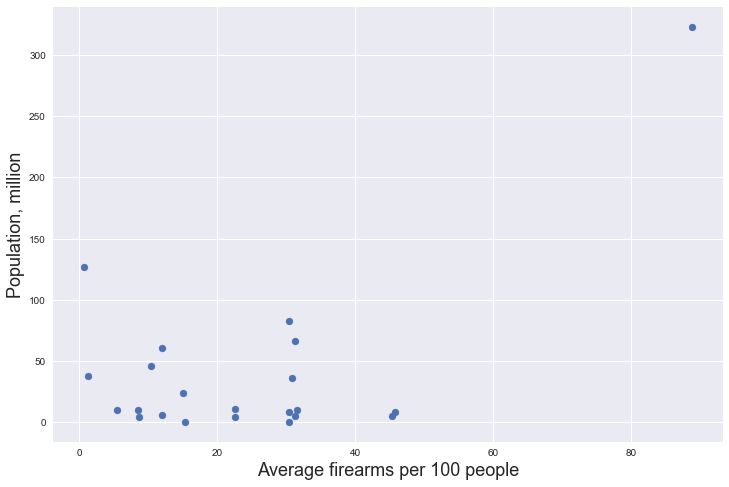

Number of Average firearms per 100 people vs Population in millions, The datapoint to the top right of the plot is the USA, which has the highest Average firearms per 100 people


In [14]:
# Plotting the average number of civilian firearms

fig = pl.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

scatter = ax.scatter(data['Average firearms per 100 people'], data['2016'] / 1e6)

ax.set_xlabel("Average firearms per 100 people", fontsize = 18)
ax.set_ylabel("Population, million", fontsize = 18)
ax.set_ylim()
pl.show()

print ("Number of Average firearms per 100 people vs Population in millions, " + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has the highest Average firearms per 100 people")

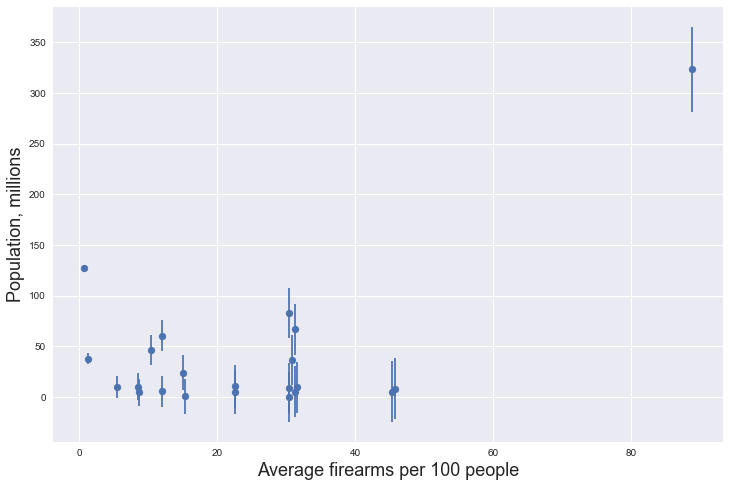

Number of Average firearms per 100 people vs Population in millions, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has the highest Average firearms per 100 people


In [15]:
# Plotting the average number of civilian firearms with errors
fig = pl.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

scatter = ax.scatter(data['Average firearms per 100 people'], data['2016'] / 1e6)
ax.errorbar(data['Average firearms per 100 people'], data['2016'] / 1e6, 
            yerr = np.sqrt(data['Average firearms per 100 people'] * 20.0), fmt = '.')

ax.set_xlabel("Average firearms per 100 people", fontsize = 18)
ax.set_ylabel("Population, millions", fontsize = 18)
ax.set_ylim()
pl.show()

print ("Number of Average firearms per 100 people vs Population in millions, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has the highest Average firearms per 100 people")

## 5. Plotting the histogram of average number of homicide by fire arms per person

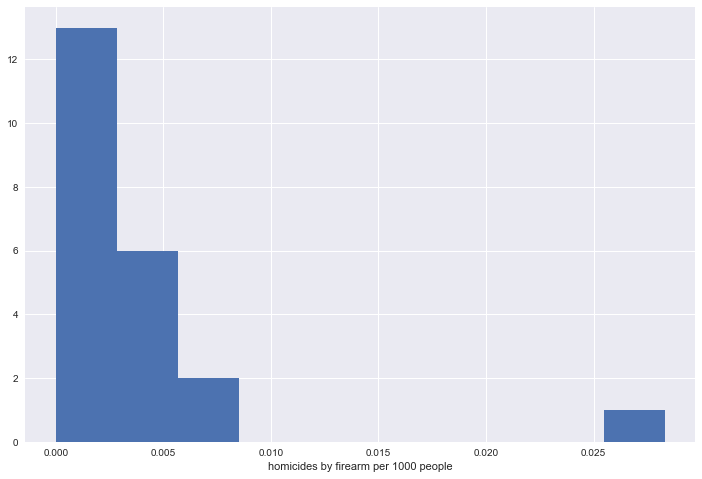

In [16]:
# Plotting the histogram of average number of homicide by fire arms per person
fig = pl.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ax.hist(data['Number of homicides by firearm'] / data['2016'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');

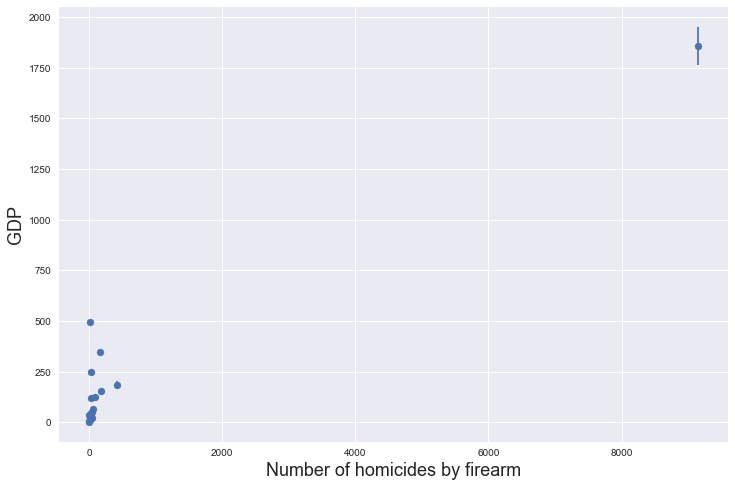

Number of homicides by firearm vs gdp, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has the highest Number of homicides by firearm


In [17]:
# scattering against the gdp

fig = pl.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

scatter = ax.scatter(data['Number of homicides by firearm'], data['gdp'] / 1e4)
ax.errorbar(data['Number of homicides by firearm'], data['gdp'] / 1e4, 
            yerr = np.sqrt(data['Number of homicides by firearm'] * 1.0), fmt = '.')

ax.set_xlabel("Number of homicides by firearm", fontsize = 18)
ax.set_ylabel("GDP", fontsize = 18)
ax.set_ylim()
pl.show()

print ("Number of homicides by firearm vs gdp, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has the highest Number of homicides by firearm")

## 6. Plotting the number of homicides by fire arm against the number of civilian firearm.

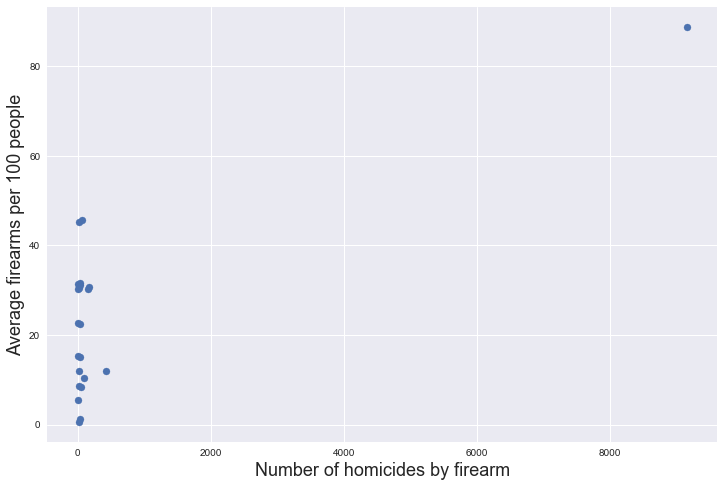

Number of homicides by firearm vs Average firearms per 100 people, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has the highest Number of homicides by firearm


In [18]:
# without errorbars

fig = pl.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

scatter = ax.scatter(data['Number of homicides by firearm'], data['Average firearms per 100 people'])

ax.set_xlabel("Number of homicides by firearm", fontsize = 18)
ax.set_ylabel("Average firearms per 100 people", fontsize = 18)
ax.set_ylim()
pl.show()

print ("Number of homicides by firearm vs Average firearms per 100 people, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has the highest Number of homicides by firearm")

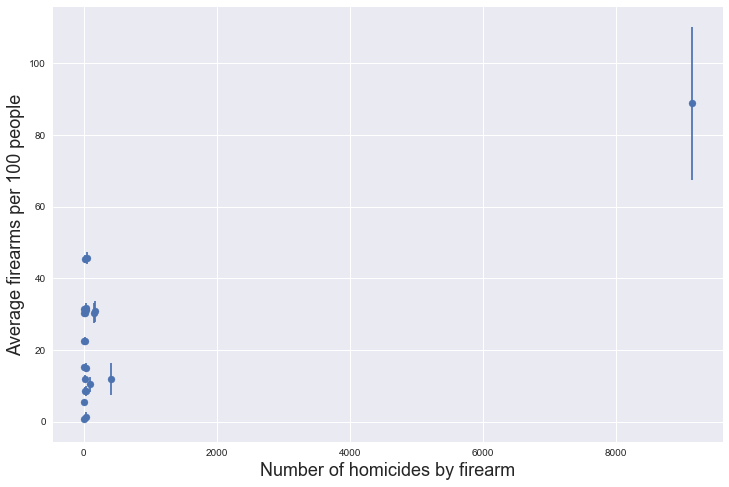

Number of homicides by firearm vs Average firearms per 100 people, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has the highest Number of homicides by firearm


In [19]:
# with errorbars

fig = pl.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

scatter = ax.scatter(data['Number of homicides by firearm'], data['Average firearms per 100 people'])

ax.errorbar(data['Number of homicides by firearm'], data['Average firearms per 100 people'], 
            yerr = np.sqrt(data['Number of homicides by firearm'] * 0.05), fmt = '.')

ax.set_xlabel("Number of homicides by firearm", fontsize = 18)
ax.set_ylabel("Average firearms per 100 people", fontsize = 18)
ax.set_ylim()
pl.show()

print ("Number of homicides by firearm vs Average firearms per 100 people, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has the highest Number of homicides by firearm")

## 7. Plotting the number of mass shootings against the number of civilian firearms.

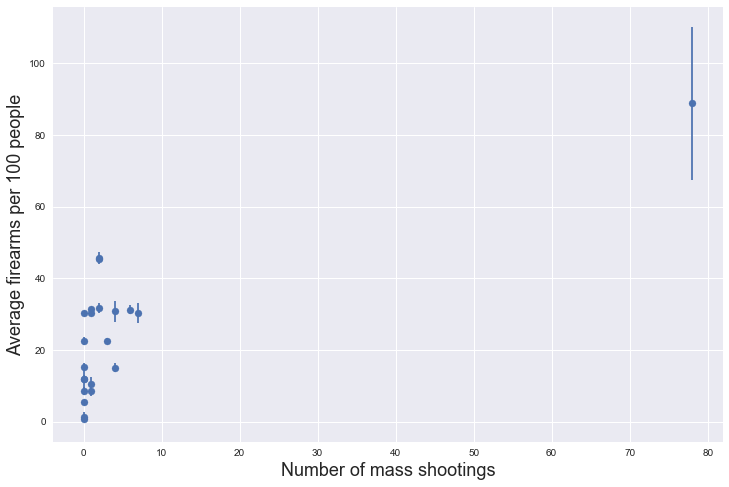

Number of mass shootings vs Average firearms per 100 people, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has the highest Number of mass shootings


In [20]:
# without errorbars

fig = pl.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

scatter = ax.scatter(data["Number of mass shootings"], data['Average firearms per 100 people'])

ax.errorbar(data["Number of mass shootings"], data['Average firearms per 100 people'], 
            yerr = np.sqrt(data['Number of homicides by firearm'] * 0.05), fmt = '.')

ax.set_xlabel("Number of mass shootings", fontsize = 18)
ax.set_ylabel("Average firearms per 100 people", fontsize = 18)
ax.set_ylim()
pl.show()

print ("Number of mass shootings vs Average firearms per 100 people, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has the highest Number of mass shootings")

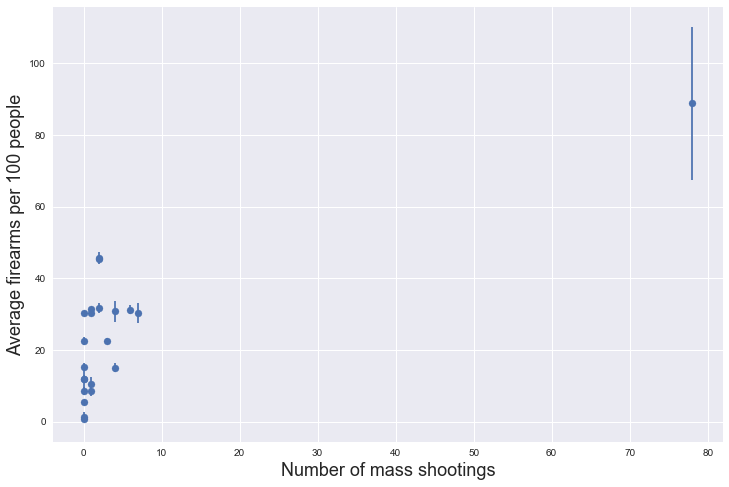

Number of mass shootings vs Average firearms per 100 people, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has the highest Number of mass shootings


In [21]:
# with errorbars

fig = pl.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

scatter = ax.scatter(data["Number of mass shootings"], data['Average firearms per 100 people'])

ax.errorbar(data["Number of mass shootings"], data['Average firearms per 100 people'], 
            yerr = np.sqrt(data['Number of homicides by firearm'] * 0.05), fmt = '.')

ax.set_xlabel("Number of mass shootings", fontsize = 18)
ax.set_ylabel("Average firearms per 100 people", fontsize = 18)
ax.set_ylim()
pl.show()

print ("Number of mass shootings vs Average firearms per 100 people, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has the highest Number of mass shootings")

## 8. Modeling

In [22]:
x = data['Average total all civilian firearms']
y = data['Number of mass shootings']

In [23]:
lm = smf.ols(formula = 'y ~ x', data = data).fit()



print('R2 = %f'%lm.rsquared)
print(lm.params)

R2 = 0.995532
Intercept    4.141158e-01
x            2.871801e-07
dtype: float64


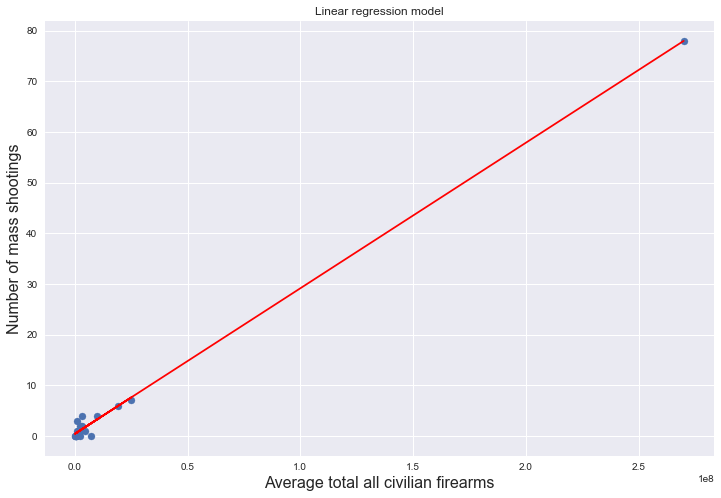

In [24]:
fig = pl.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

scatter = ax.scatter(x, y)

pl.plot(x, lm.predict(), 'r-')

pl.xlabel('Average total all civilian firearms', fontsize=16)
pl.ylabel('Number of mass shootings', fontsize=16)
pl.title('Linear regression model')
pl.show()



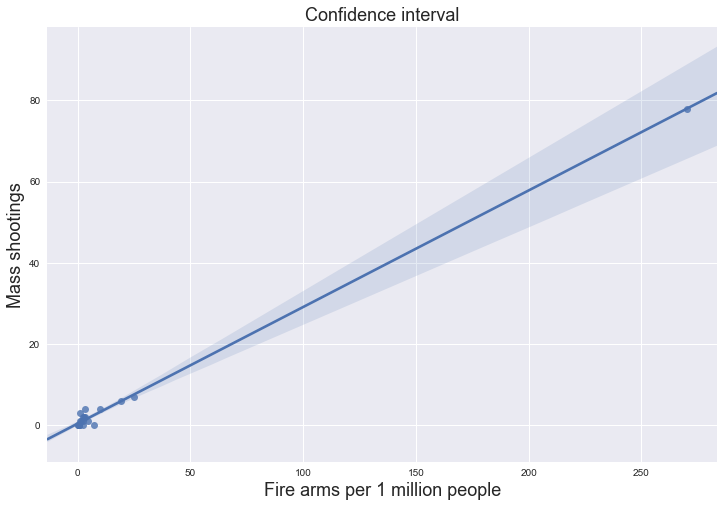

In [25]:
fig = pl.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

x = data['Average total all civilian firearms'] / 1e6
y = data['Number of mass shootings']

sns.regplot(x=x, y=y, data=data);

pl.ylabel("Mass shootings", fontsize=18)
pl.xlabel("Fire arms per 1 million people", fontsize=18);
pl.title('Confidence interval', fontsize=18)

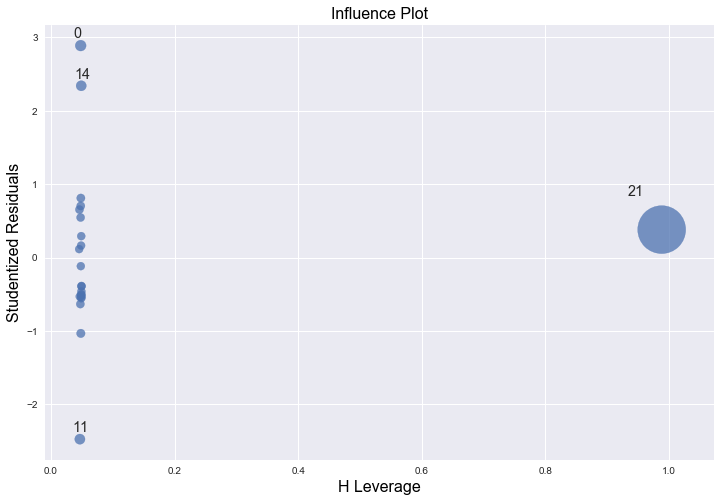

In [50]:
# Plotting the influence plot
fig = pl.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

sm.graphics.influence_plot(lm, alpha  = 0.05, criterion="cooks", ax = ax);

## 9. Discussion